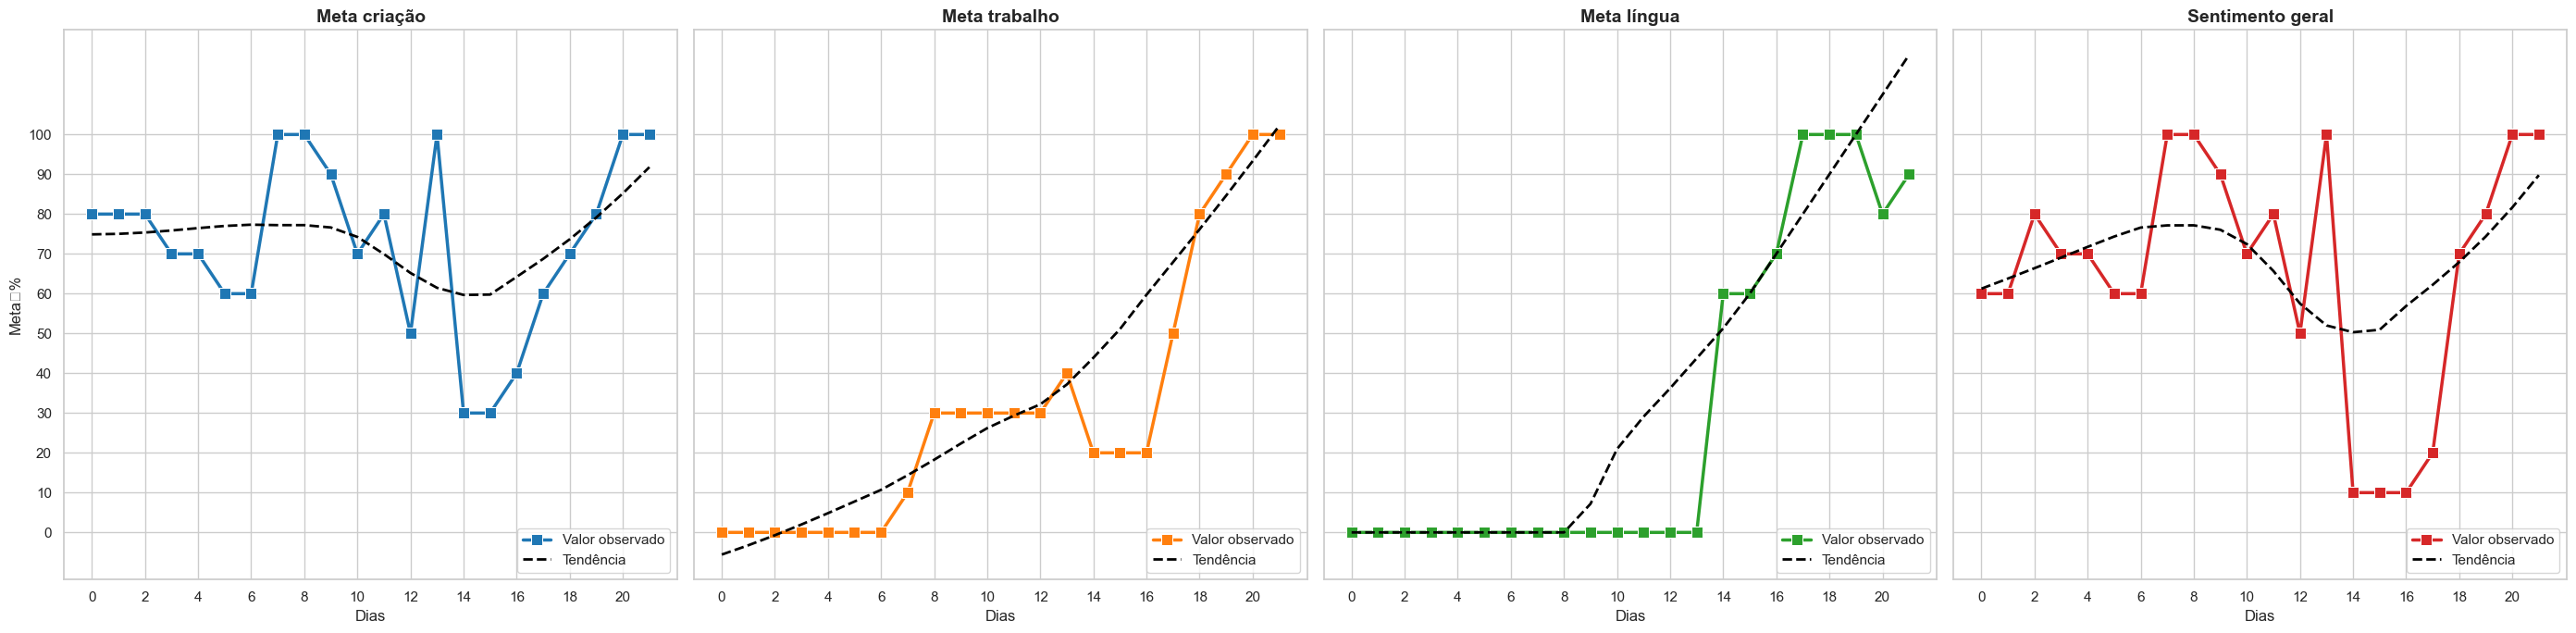

In [5]:
# -------------------------------------------------
# plot_beautiful.py
# -------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams["font.family"] = "DejaVu Sans"

# ------------------------------------------------------------------
# 1️⃣  Data preparation – put everything in a tidy DataFrame
# ------------------------------------------------------------------
days = np.arange(0, 22)                     # 0‑21 inclusive
data = {
    "dias": np.tile(days, 4),
    "valor": np.concatenate([
        [60, 60, 80, 70, 70, 60, 60, 100, 100, 90, 70, 80, 50, 100,
         10, 10, 10, 20, 70, 80, 100, 100],   # sentimento_geral
        [80, 80, 80, 70, 70, 60, 60, 100, 100, 90, 70, 80, 50, 100,
         30, 30, 40, 60, 70, 80, 100, 100],   # meta_criacao
        [0, 0, 0, 0, 0, 0, 0, 10, 30, 30, 30, 30, 30, 40,
         20, 20, 20, 50, 80, 90, 100, 100],   # meta_trabalho
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         60, 60, 70, 100, 100, 100, 80, 90]   # meta_lingua
    ]),
    "categoria": np.repeat(
        ["Sentimento geral", "Meta criação", "Meta trabalho", "Meta língua"],
        len(days)
    )
}
df = pd.DataFrame(data)

# ------------------------------------------------------------------
# 2️⃣  Global aesthetic tweaks
# ------------------------------------------------------------------
sns.set_theme(style="whitegrid")          # clean background + grid
palette = sns.color_palette("tab10")      # distinct colors per subplot

# ------------------------------------------------------------------
# 3️⃣  Build a 1×4 subplot layout
# ------------------------------------------------------------------
fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)

# Mapping from category name to axis index (order matches original script)
order = ["Meta criação", "Meta trabalho", "Meta língua", "Sentimento geral"]
for ax, (cat, color) in zip(axes, zip(order, palette)):
    sub_df = df[df["categoria"] == cat]

    # ----- a) Line plot (raw values) ---------------------------------
    sns.lineplot(
        data=sub_df,
        x="dias",
        y="valor",
        marker="s",
        linewidth=2.5,
        markersize=8,
        color=color,
        ax=ax,
        label="Valor observado"
    )

    # ----- b) Trend line (linear regression) -------------------------
    # Using lowess (locally weighted scatterplot smoothing) gives a smoother
    # tendency line without assuming strict linearity.
    sns.regplot(
        data=sub_df,
        x="dias",
        y="valor",
        scatter=False,               # hide the underlying points (already plotted)
        lowess=True,                 # smooth non‑linear trend
        line_kws={"color": "black", "linestyle": "--", "linewidth": 2},
        ax=ax,
        label="Tendência"
    )

    # ----- c) Axis cosmetics -----------------------------------------
    ax.set_title(cat, fontsize=14, fontweight="bold")
    ax.set_xlabel("Dias", fontsize=12)
    ax.set_ylabel("Meta %" if ax == axes[0] else "", fontsize=12)  # only first y‑label
    ax.set_xticks(days[::2])       # show every second day for readability
    ax.set_yticks(np.arange(0, 110, 10))
    ax.legend(loc="lower right")

# ------------------------------------------------------------------
# 4️⃣  Tight layout & display
# ------------------------------------------------------------------
plt.tight_layout()
plt.show()

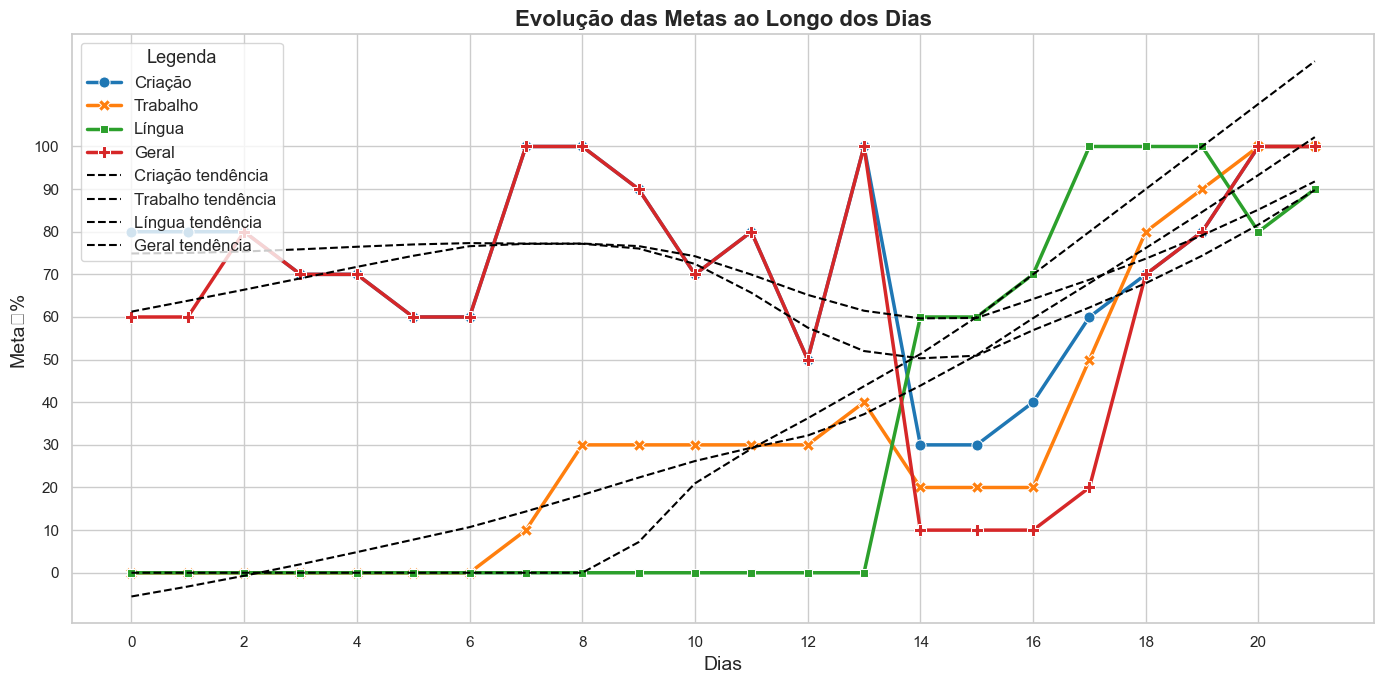

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl

# ──► Font handling (keeps the glyph‑warning out)
mpl.rcParams["font.family"] = "DejaVu Sans"
warnings.filterwarnings(
    "ignore",
    message=r".*Glyph 8239.*Arial.*",
    category=UserWarning,
)

# ──► Data (same as before) …
# (days, meta_criacao, meta_trabalho, meta_lingua, sentimento_geral)

# ──► Build tidy DataFrame (same as before) …
# (df with columns: dias, valor, categoria)

# ──► Theme
sns.set_theme(style="whitegrid")

# ──► **Palette with exactly 4 colours**
palette = sns.color_palette("tab10", n_colors=4)   # ← fixed length

plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plot raw series (markers = 'o')
sns.lineplot(
    data=df,
    x="dias",
    y="valor",
    hue="categoria",
    style="categoria",
    markers=True,
    dashes=False,
    linewidth=2.5,
    markersize=8,
    palette=palette,          # ← use the trimmed palette here
    ax=ax,
)

# Trend lines (lowess) – unchanged
for cat, color in zip(df["categoria"].unique(), palette):
    sub = df[df["categoria"] == cat]
    sns.regplot(
        data=sub,
        x="dias",
        y="valor",
        scatter=False,
        lowess=True,
        line_kws={"color": "black", "linestyle": "--", "linewidth": 1.5},
        ax=ax,
        label=f"{cat} tendência",
    )

# Axes cosmetics – unchanged
ax.set_title("Evolução das Metas ao Longo dos Dias", fontsize=16, fontweight="bold")
ax.set_xlabel("Dias", fontsize=14)
ax.set_ylabel("Meta %", fontsize=14)
ax.set_xticks(np.arange(0, 22, 2))
ax.set_yticks(np.arange(0, 110, 10))
ax.legend(title="Legenda", loc="upper left", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

**Meu diario**

Avaliacao do Mes de Agosto/2025

Como visto no grafico, comecei o mes disposto a focar em meu futuro, sem distracoes, passei a dedicar um tempo do dia a criar coisas relacionadas a minha area de atuacao em tecnologia.
Ja em relacao a segunda meta, nao havia me sentido relevante no trabalho ate comecar a realizar entregas menos superfluas.
Houve esse pequeno deslize entre os dias 13/08 - 18/08... Fiquei sabendo da aprovacao de vagas para um concurso que paga muito bem e me distrai. Pensei se deveria focar no concurso ou continuar com meu foco no que havia escolhido anteriormente. Acabei por focar na minha escolha anterior, cansei de perder o foco, dessa vez nao sinto que irei parar de seguir nessa escolha. Quero ser um 'castor profissional'.